# Importing Data

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from pywaffle import Waffle 
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# import 2010-2019 csv dataset
pwd = os.getcwd()
filepath = pwd + "/Crime_Data_from_2010_to_2019.csv"
df = pd.read_csv(filepath)

In [3]:
# import 2020-present csv dataset
pwd = os.getcwd()
filepath = pwd + "/Crime_Data_from_2020_to_Present.csv"
df_1 = pd.read_csv(filepath)

In [4]:
# concat both datasets 
df = pd.concat([df, df_1])

# Data Cleaning 

In [5]:
# drop irrelevant columns
df = df.drop(["DR_NO", "AREA", "Rpt Dist No", "Part 1-2", "Crm Cd", "Cross Street", 
        "Mocodes", "Premis Cd", "Weapon Used Cd", "Status", "Status Desc", 
        "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"], axis=1)

In [6]:
# rename columns
df = df.rename(columns={"Date Rptd": "Date Reported", "DATE OCC": "Date Occured", 
                    "TIME OCC": "Time Occured", "AREA NAME": "Area Name", 
                    "Crm Cd Desc": "Crime Description", "Vict Age": "Victim Age",
                    "Vict Sex": "Victim Sex", "Vict Descent": "Victim Descent", 
                    "Premis Desc": "Premis Description", "Weapon Desc": "Weapon Description", 
                    "LOCATION": "Location", "LAT": "Latitude", "LON": "Longitude"})

In [7]:
# disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# convert first 3 columns to datetime
df[["Date Reported", "Date Occured"]] = df[["Date Reported", "Date Occured"]].apply(pd.to_datetime)

In [8]:
# relabel Victim Descent column strings
df["Victim Descent"] = df['Victim Descent'].str.replace('A', 'Other Asian')
df["Victim Descent"] = df['Victim Descent'].str.replace('B', 'Black')
df["Victim Descent"] = df['Victim Descent'].str.replace('C', 'Chinese')
df["Victim Descent"] = df['Victim Descent'].str.replace('D', 'Cambodian')
df["Victim Descent"] = df['Victim Descent'].str.replace('F', 'Filipino')
df["Victim Descent"] = df['Victim Descent'].str.replace('G', 'Guamanian')
df["Victim Descent"] = df['Victim Descent'].str.replace('H', 'Hispanic/Latin/Mexican')
df["Victim Descent"] = df['Victim Descent'].str.replace('I', 'American Indian/Alaskan Native')
df["Victim Descent"] = df['Victim Descent'].str.replace('J', 'Japanese')
df["Victim Descent"] = df['Victim Descent'].str.replace('K', 'Korean')
df["Victim Descent"] = df['Victim Descent'].str.replace('L', 'Laotian')
df["Victim Descent"] = df['Victim Descent'].str.replace('O', 'Other')
df["Victim Descent"] = df['Victim Descent'].str.replace('P', 'Pacific Islander')
df["Victim Descent"] = df['Victim Descent'].str.replace('S', 'Samoan')
df["Victim Descent"] = df['Victim Descent'].str.replace('U', 'Hawaiian')
df["Victim Descent"] = df['Victim Descent'].str.replace('V', 'Vietnamese')
df["Victim Descent"] = df['Victim Descent'].str.replace('W', 'White')
df["Victim Descent"] = df['Victim Descent'].str.replace('Z', 'Asian Indian')
df["Victim Descent"] = df['Victim Descent'].str.replace('X', 'Unknown')

# relabel Victim Sex coulmn strings 
df["Victim Sex"] = df['Victim Sex'].str.replace('M', 'Male')
df["Victim Sex"] = df['Victim Sex'].str.replace('F', 'Female')
df["Victim Sex"] = df['Victim Sex'].str.replace('X', 'Other')
df["Victim Sex"] = df['Victim Sex'].str.replace('H', 'Other')

In [9]:
# drop duplicates 
df = df.drop_duplicates()

In [10]:
# sort dataframe by Date Occured
df = df.sort_values(by="Date Occured")

# Data Analysis/Visualization

## What are the chances of becoming a crime victim in the city of LA in the next year? 

    - Any type of crime incident

In [11]:
# convert date column to datetime
df['Date Occured'] = pd.to_datetime(df['Date Occured'])

# set time stamp
start_date = '01-01-2021'
end_date = '12-31-2021'

# create df with 2010 crime 
mask = (df['Date Occured'] >= start_date) & (df['Date Occured'] <= end_date)
df_2021 = df.loc[mask]
df_2021 = df_2021.sort_values(by="Date Occured")

In [12]:
# calculate probability of becoming a crime victim in the city of LA in the next year
occurences = len(df_2021)
population = 3849297 # July 1st 2021 population (Based on government census)
probability = occurences/population
print("{0:.0%}".format(probability)) # 1 in 20 chance 

5%


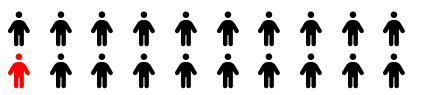

In [13]:
# display visual
fig = plt.figure(FigureClass=Waffle,
                rows=2, 
                columns=10,
                values=[1, 20], 
                icons="person",
                font_size=35,
                colors=['red', 'black'])

There is an approximate 1 in 20 chance of becoming a crime victim in the city of LA in the next year.

    - Dataset Caveats

            1. An individual may have been a victim more than once
            2. Some crimes are not reported
            3. Some crimes involve more than one victim
            4. Some crimes may have no victims
            5. Population data is an estimate


## What are the chances of being robbed in the city of LA in the next year?

In [14]:
# select rows from crime description column that contain "ROBBERY" (Includes attempted robbery)
robbery = df_2021[df_2021["Crime Description"].str.contains("ROBBERY")]

# calculate probability of being robbed in the city of LA in the next year
occurences = len(robbery)
probability = occurences/population
print("{0:%}".format(probability)) # 2 in 1,000 chance 

0.220560%


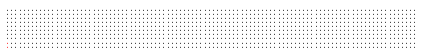

In [15]:
# display visual
fig = plt.figure(FigureClass=Waffle,
                rows=10, 
                columns=100,
                values=[2, 1000], 
                icons="circle-dot",
                font_size=1,
                colors=['red', 'black'])

There is an approximate 2 in 1,000 chance of being robbed in the city of LA in the next year

    - Dataset Caveats

            1. An individual may have been robbed more than once
            2. Some robberies may have not been reported
            3. Some robberies involve more than one victim
            4. Dataset includes attempted robberies 
            5. Population data is an estimate

## What are the chances of getting your vehicle stolen in the city of LA in the next year?

In [16]:
# select rows from crime description column that contain "VEHICLE - STOLEN"
stolen_vehicle = df_2021[df_2021["Crime Description"].str.contains("VEHICLE - STOLEN")]

# calculate probability of getting your vehicle stolen in the city of LA in the next year 
occurences = len(stolen_vehicle)
probability = occurences/population
print("{0:%}".format(probability)) # 6 in 1,000 chance 

0.608397%


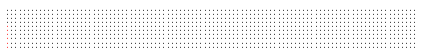

In [17]:
# display visual
fig = plt.figure(FigureClass=Waffle,
                rows=10, 
                columns=100,
                values=[6, 1000], 
                icons="circle-dot",
                font_size=1,
                colors=['red', 'black'])

There is an approximate 6 in 1,000 chance of getting your vehicle stolen in the city of LA in the next year

    - Dataset Caveats

            1. An individual may have had their vehicle stolen more than once
            2. Some incidents may have not been reported (Highly unlikely)
            3. Some incidents involve more than one victim
            4. Population data is an estimate

## What are the chances of being assaulted in the city of LA in the next year?

In [18]:
# select rows from crime description column that contain "BATTERY - SIMPLE ASSAULT" 
assualted = df_2021[df_2021["Crime Description"].str.contains("BATTERY - SIMPLE ASSAULT")]

# calculate probability of being assaulted in the city of LA in the next year
occurences = len(assualted)
probability = occurences/population
print("{0:%}".format(probability)) # 4 in 1,000 chance 

0.418804%


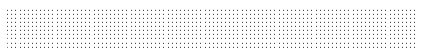

In [19]:
# display visual
fig = plt.figure(FigureClass=Waffle,
                rows=10, 
                columns=100,
                values=[4, 1000], 
                icons="circle-dot",
                font_size=1,
                colors=['red', 'black'])

There is an approximate 4 in 1,000 chance of being assaulted in the city of LA in the next year

    - Dataset Caveats

            1. An individual may have been assaulted more than once
            2. Some incidents may have not been reported 
            3. Some incidents involve more than one victim
            4. Population data is an estimate

## What are the chances of being murdered in the city of LA in the next year?

In [20]:
# select rows from crime description column that contain "CRIMINAL HOMICIDE" 
murdered = df_2021[df_2021["Crime Description"].str.contains("CRIMINAL HOMICIDE")]

# calculate probability of being murdered in the city of LA in the next year
occurences = len(murdered)
probability = occurences/population
print("{0:%}".format(probability)) # 1 in 10,000 chance 

0.010340%


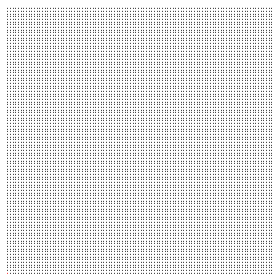

In [21]:
# display visual
fig = plt.figure(FigureClass=Waffle,
                rows=100, 
                columns=100,
                values=[1, 10000], 
                icons="circle-dot",
                font_size=1,
                colors=['red', 'black'])

There is an approximate 1 in 10,000 chance of being murdered in the city of LA in the next year

    - Dataset Caveats

            1. Some incidents may have not been reported 
            2. Some incidents involve more than one victim
            3. Population data is an estimate

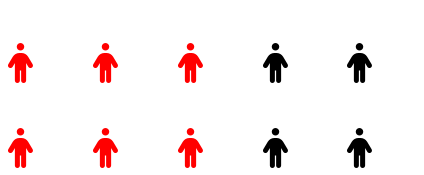

In [2]:
# display visual
fig = plt.figure(FigureClass=Waffle,
                rows=2, 
                columns=5,
                values=[15, 10], 
                icons="person",
                font_size=40,
                colors=['red', 'black'])